In [3]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
import re
from collections import Counter

# 讀入csv檔

In [4]:
orgdata = pd.read_csv('歷年重大交通事故地點.csv')

In [5]:
orgdata.head()

,ACCTIME,PLACE,DEAD,HURT,CARTYPE,RSN
0,10:30,雲林縣麥寮鄉三盛村工業路520巷1號附近,4,3,自小客車、自小客車,側撞
1,20:59,國道5號北向轉國道3號南向系統匝道,33,11,營大客車,擦撞匝道外側護欄
2,7:20,苗栗縣苑裡鎮上館里75-7號(苗43線1.6公里處附近),3,1,營大貨車、自大貨車,自撞電線桿
3,8:20,臺北市士林區仰德大道3段與新安路口,4,10,營大貨車、自小客車、普通重機,側撞、對撞
4,21:49,屏東縣萬丹鄉西環路與和平西路口及西環路與萬壽路口,3,7,自小貨車、自小客車,追撞、側撞


In [6]:
documents = ['我是臺灣師範大學科技系113級李招蓁']#一段字串
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)#用jieba做cut斷詞
    print('/'.join(seg_list))#印出來的內容用斜線隔開

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/w8/tmvlnn_j6c13rnh3g4zgpqhw0000gn/T/jieba.cache
Loading model cost 1.119 seconds.
Prefix dict has been built successfully.


我/是/臺/灣師/範大學/科技/系/113/級/李招蓁


In [7]:
#載入自己建立斷詞文本
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺灣/師範大學/科技系/113級/李招蓁


In [8]:
#新增一個新欄位 來放斷詞
orgdata['seg'] = ""
orgdata.head()

,ACCTIME,PLACE,DEAD,HURT,CARTYPE,RSN,seg
0,10:30,雲林縣麥寮鄉三盛村工業路520巷1號附近,4,3,自小客車、自小客車,側撞,
1,20:59,國道5號北向轉國道3號南向系統匝道,33,11,營大客車,擦撞匝道外側護欄,
2,7:20,苗栗縣苑裡鎮上館里75-7號(苗43線1.6公里處附近),3,1,營大貨車、自大貨車,自撞電線桿,
3,8:20,臺北市士林區仰德大道3段與新安路口,4,10,營大貨車、自小客車、普通重機,側撞、對撞,
4,21:49,屏東縣萬丹鄉西環路與和平西路口及西環路與萬壽路口,3,7,自小貨車、自小客車,追撞、側撞,


In [9]:
index = 0
for documents in orgdata['RSN']:
    seg_list = jieba.analyse.extract_tags(str(documents), 150) #前150個權重最高的單詞
    orgdata['seg'].iloc[index] = seg_list #存入seg_list
    index += 1
    

/var/folders/w8/tmvlnn_j6c13rnh3g4zgpqhw0000gn/T/ipykernel_820/2323853507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orgdata['seg'].iloc[index] = seg_list #存入seg_list


In [23]:
orgdata['seg']

0                         [側撞]
1                 [外側, 護欄, 匝道]
2                    [自撞, 電線桿]
3                         [側撞]
4                     [追撞, 側撞]
5                 [自撞, 內側, 護欄]
6                        [自撞路]
7            [帶護欄, 分隔, 跨越, 中央]
8                         [追撞]
9                         [追撞]
10                        [側撞]
11                        [追撞]
12                    [自撞, 牌樓]
13               [自撞, 島護欄, 分隔]
14                        [追撞]
15                        [追撞]
16                        [追撞]
17                    [路口, 交叉]
18                        [同向]
19                        [出路]
20                   [撞路邊, 停車]
21    [翻車, 危險, 洩漏, 摔倒, 物品, 路上]
22                    [號誌, 標誌]
23                        [追撞]
24                        [追撞]
25                        [撞護]
26                        [撞護]
27                    [翻車, 路上]
28        [附載, 氣體, 燃燒, 甲醇, 出路]
29                       [建築物]
30                        [追撞]
31                        [自撞]
32      

In [10]:
data_seg_list = orgdata['seg'].tolist()
type(data_seg_list)

list

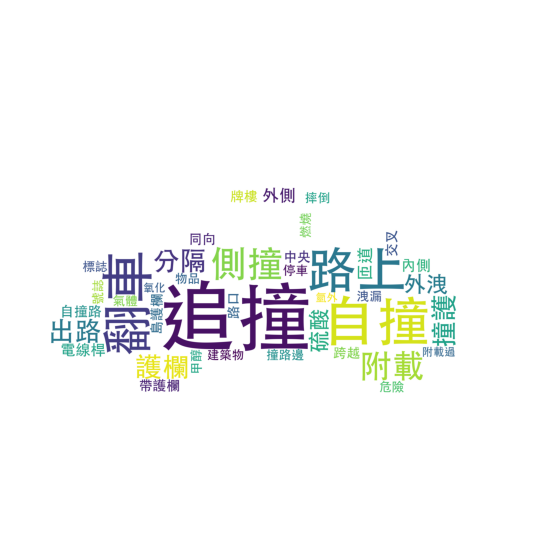

In [11]:
flat = [x for datalist in data_seg_list for x in datalist]
diction = Counter(flat)

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

mask = np.array(Image.open("car.png"))
font = "/System/Library/Fonts/STHeiti Medium.ttc"

wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
orgdata.head()

,ACCTIME,PLACE,DEAD,HURT,CARTYPE,RSN,seg
0,10:30,雲林縣麥寮鄉三盛村工業路520巷1號附近,4,3,自小客車、自小客車,側撞,[側撞]
1,20:59,國道5號北向轉國道3號南向系統匝道,33,11,營大客車,擦撞匝道外側護欄,"[外側, 護欄, 匝道]"
2,7:20,苗栗縣苑裡鎮上館里75-7號(苗43線1.6公里處附近),3,1,營大貨車、自大貨車,自撞電線桿,"[自撞, 電線桿]"
3,8:20,臺北市士林區仰德大道3段與新安路口,4,10,營大貨車、自小客車、普通重機,側撞、對撞,[側撞]
4,21:49,屏東縣萬丹鄉西環路與和平西路口及西環路與萬壽路口,3,7,自小貨車、自小客車,追撞、側撞,"[追撞, 側撞]"
